In [1]:
import time 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75_train.csv")

In [3]:
from collections import Counter

def build_vocab(data):
    word_counts = Counter(row.lower() for sample in data for row in sample)
    vocab = [w for w, f in iter(word_counts.items())]
    return vocab

def k_mers(data, n):
    kmer_array = [[s[i:i + n].lower() for i in range(len(s) - n)] for s in data]
    vocab = build_vocab(kmer_array)
    # kmer_array = [[vocab.index(w) for w in row] for row in kmer_array]
    return kmer_array, vocab

In [19]:
kmer_array, vocab = k_mers(data['Sequence'], 2)

In [6]:
np.save("data/linear_features/cdhit80_k4_vocab", np.array(vocab))

In [ ]:
np.load("data/linear_features/cdhit80_k4_vocab.npy")

In [20]:
    
features_data = []
for s in kmer_array:
    s = np.array(s)
    t = time.time()
    # Weights
    w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
    w_abs = np.abs(w)
    w_max = (w.max() + 1)
    w = w_abs - w_max
    w = np.power(w , 2)
    # 最大權重
    L = np.sum(w, axis=0)
    
    linear_data = None
    for v in vocab:
        d = np.where(s == v, w, 0)
        d = np.sum(d, axis=1)
        d = d / L
        f_array = np.array([d])
        linear_data = f_array if linear_data is None else np.append(linear_data, f_array, axis=0)
    linear_data = np.array(linear_data)
    features_data.append(linear_data.tolist())

KeyboardInterrupt: 

In [13]:
import pickle
with open("data/linear_features/kmer_d/k1", 'wb') as f:
    pickle.dump(features_data, f)

In [15]:
with open("data/linear_features/kmer_d/k1", 'rb') as f:
    data = pickle.load(f)
print(len(data[1]))

4


22741


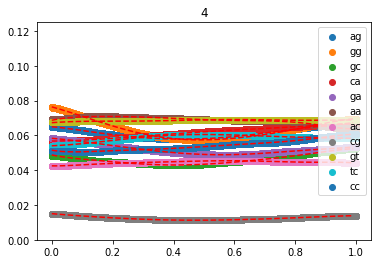

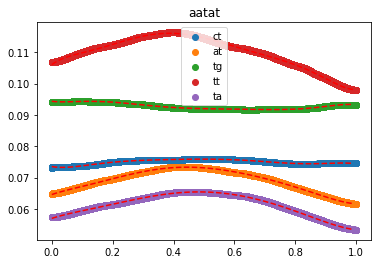

[ 0.4374832  -1.61378432  2.46130379 -1.89604383  0.70384676 -0.12829967
  0.03183894  0.05696161]


In [48]:
# V-2

nor_d = False
nor_l = True

# s = np.array(list("aatat"))
idx = 100
idx = np.random.randint(len(kmer_array))
s = np.array(kmer_array[idx])
print(len(s))
w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
w = np.abs(w) - w.max()
w = np.power(w - 1, 2)
L = np.sum(w, axis=0)

i = 0
for v in vocab:
    d = np.where(s == v, w, 0)
    d = np.sum(d, axis=1)
    d = d / L
    # nor
    if nor_d and d.max() - d.min():
        d = (d - d.min()) / (d.max() - d.min())
    xlim = np.linspace(0, 1.0, num=len(d)) if nor_l else np.arange(len(d))
    z = np.polyfit(xlim, d, 7)
    p = np.poly1d(z)
    plt.scatter(xlim, d, label=v)
    t = np.arange(0, max(xlim), 0.01)
    plt.plot(t, p(t), 'r--')
    i += 1
    if i > 10:
        i = 0
        plt.ylim(0, (1 / len(vocab)) * 2)
        plt.title(idx)
        plt.legend()
        plt.show()

# plt.ylim(0, 1)
# plt.ylim(0, (1 / len(vocab)) * 2)
plt.title("aatat")
plt.legend()
plt.show()
print(z)

In [7]:
def features_linear_encoder(data, vocab, power=10):
    features_data = []
    for s in data:
        s = np.array(s)
        t = time.time()
        w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
        w_abs = np.abs(w)
        w_max = (w.max() + 1)
        w = w_abs - w_max
        w = np.power(w , 2)
        L = np.sum(w, axis=0)
        
        linear_data = np.array([])
        for v in vocab:
            d = np.where(s == v, w, 0)
            d = np.sum(d, axis=1)
            d = d / L
            z = np.polyfit(np.arange(len(d)), d, power)
            linear_data = np.append(linear_data, z)
        features_data.append(linear_data.tolist())
        print("s:", len(s)," t:", time.time() - t)
    return features_data
features_data = features_linear_encoder(kmer_array, vocab=vocab)

KeyboardInterrupt: 

In [ ]:
features_output = pd.DataFrame(features_data)
features_output["len"] = [len(s) for s in data["Sequence"]]
features_output["Cytosolic"] = data["Cytosolic"]
features_output["Nucleus"] = data["Nucleus"]
features_output.to_csv("data/features_output_data.csv", index=False)

In [ ]:
for s in data:
    print(len(s))
    t = time.time()
    w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
    print("w:", time.time() - t)

    t = time.time()
    w_abs = np.abs(w)
    print("w_abs:", time.time() - t)

    t = time.time()
    w_max = (w.max() + 1)
    print("w_max:", time.time() - t)

    t = time.time()
    w = w_abs - w_max
    print("w_abs - w_max:", time.time() - t)

    t = time.time()
    w = np.power(w , 2)
    print("w:", time.time() - t)

    t = time.time()
    L = np.sum(w, axis=0)
    print("w_sum:", time.time() - t)
    break